# Chargement données nettoyage

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

import json

sns.set()

data2016 = pd.read_csv("2016-building-energy-benchmarking.csv", sep=',')
data2015 = pd.read_csv("2015-building-energy-benchmarking.csv", sep=',')

## concaténation 2015 2016 en data

In [2]:
frames = [data2015, data2016]
data = pd.concat(frames, keys=["2015","2016"],sort=False )

In [3]:
data2015.columns


Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

## drop colonnes de données geographiques et inutiles

In [4]:
data = data.drop(columns=["City", "State", "City Council Districts", "SPD Beats",
                          "Address", "Seattle Police Department Micro Community Policing Plan Areas",
                          "Outlier", "ComplianceStatus", "Comment", "Comments", "DefaultData", 
                          "TaxParcelIdentificationNumber", "Location", 
                          "2010 Census Tracts",'Zip Codes','ZipCode', 'Latitude', 'Longitude', 'Comments'])
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

In [5]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='o

## fusion des colonnes 
TotalGHGEmissions", 'GHGEmissions(MetricTonsCO2e)', 
"GHGEmissionsIntensity" 'GHGEmissionsIntensity(kgCO2e/ft2)']

In [6]:
colManquantes2015 = ["TotalGHGEmissions", "GHGEmissionsIntensity"]
colManquantes2016 = ['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']

col = colManquantes2015+colManquantes2016

for idx, row in data.loc[("2016")].iterrows():
    data.loc[("2016",idx), "GHGEmissions(MetricTonsCO2e)" ]=    data.loc[("2016",idx), "TotalGHGEmissions"]
    data.loc[("2016",idx), "GHGEmissionsIntensity(kgCO2e/ft2)"]= data.loc[("2016",idx), "GHGEmissionsIntensity"]

for idx, row in data.loc[("2015")].iterrows():
    data.loc[("2015",idx), "TotalGHGEmissions"]= data.loc[("2015",idx), 'GHGEmissions(MetricTonsCO2e)']
    data.loc[("2015",idx), "GHGEmissionsIntensity"]=  data.loc[("2015",idx), 'GHGEmissionsIntensity(kgCO2e/ft2)']


In [7]:

dropColumns = ["GHGEmissionsIntensity",
"GHGEmissionsIntensity(kgCO2e/ft2)",
'SiteEUIWN(kBtu/sf)',
'SiteEUI(kBtu/sf)',
'SiteEnergyUse(kBtu)',
'SiteEnergyUseWN(kBtu)',
'SteamUse(kBtu)',
'Electricity(kWh)',
'Electricity(kBtu)',
'NaturalGas(therms)',
'NaturalGas(kBtu)',
'OtherFuelUse(kBtu)',
'SourceEUIWN(kBtu/sf)', "TotalGHGEmissions",  "PrimaryPropertyType"]


In [8]:
data = data.drop(columns=dropColumns)
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

## drop données Second et Third

In [9]:
col = ["PrimaryPropertyType" , "ListOfAllPropertyUseTypes", "LargestPropertyUseType", 
       "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]


In [10]:
col = ["SecondLargestPropertyUseTypeGFA","ThirdLargestPropertyUseTypeGFA" ]
data = data.drop(columns=col)
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

In [11]:
col = ["YearsENERGYSTARCertified" ]
data = data.drop(columns=col)
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

In [12]:
col = ['DataYear', 'PropertyName','Neighborhood', "LargestPropertyUseTypeGFA", "ListOfAllPropertyUseTypes"]
data = data.drop(columns=col)
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

## doublons

In [13]:
doublons = [ i for i in data.loc["2015","OSEBuildingID"].duplicated().to_list() if i == True ]
doublons

[]

In [14]:

doublons = [ i for i in data.loc["2016","OSEBuildingID"].duplicated().to_list() if i == True ]
doublons

[]

## Supprime individus sans building ID


In [15]:
data = data.dropna(subset=['OSEBuildingID'])
data2015 = data.loc[('2015'), :]
data2016 = data.loc[('2016'), :]

In [16]:
# sole2016 = [ i for i in data.loc["2016","OSEBuildingID"].values if not i in data.loc["2015","OSEBuildingID"].values ]
# print("indivIsole2016", len(indivIsole2016))

In [17]:
# indivIsole2015 = [ i for i in data.loc["2015","OSEBuildingID"].values if not i in data.loc["2016","OSEBuildingID"].values ]
# print("indivIsole2015", len(indivIsole2015) )

In [18]:
# idxIsole2015 = [i for i in data2015["OSEBuildingID"].index if data2015.loc[i,"OSEBuildingID"] in indivIsole2015]
# idxIsole2016 = [i for i in data2016["OSEBuildingID"].index if data2016.loc[i,"OSEBuildingID"] in indivIsole2016]

In [19]:
# col2015 = [("2015", idxIsole2015[i]) for i in range(0,len(idxIsole2015)) ]
# col2016 = [("2016", idxIsole2016[i]) for i in range(0,len(idxIsole2016)) ]


## Supprime individus sans building 'LargestPropertyUseType'


In [20]:
data = data.dropna(subset=['LargestPropertyUseType'])

# Engineer featurering

 Différence entre   'SiteEUI(kBtu/sf)' et   'SourceEUI(kBtu/sf)',

*EPA REcommends using source energy*
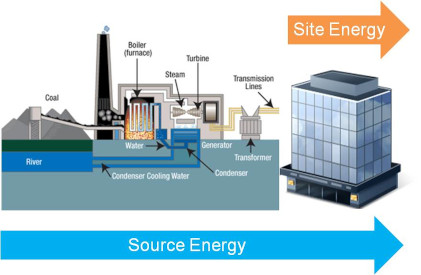

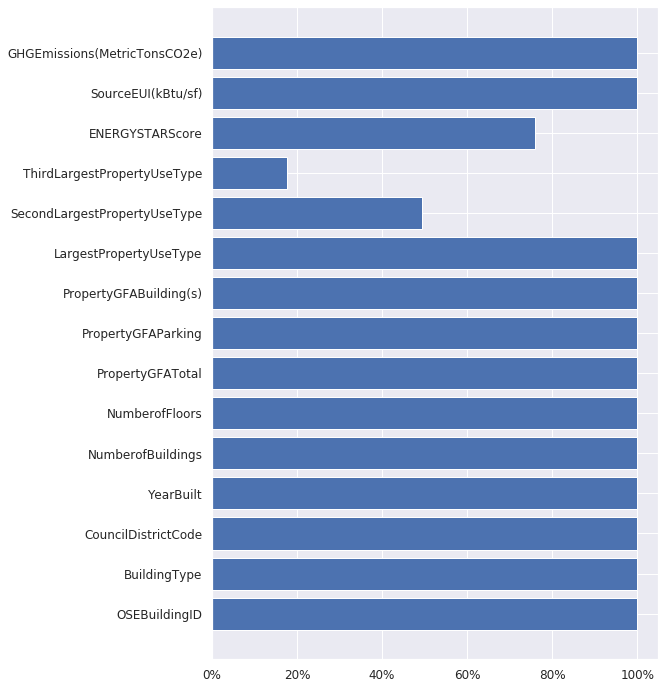

In [21]:
collumns_noNaN = data


xlabel = data.columns
fig = plt.figure(figsize=(8,12))
plot = fig.add_subplot(1, 1, 1)
plt.barh(xlabel, 100*collumns_noNaN.count()/collumns_noNaN.shape[0])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


fmt = '%.0f%%'  # Format you want the ticks, e.g. '40%'
yyticks = mtick.FormatStrFormatter(fmt)

# yaxis

plot.xaxis.set_major_formatter(yyticks)



plt.show()

## construction variables quanti / quali

In [22]:
def filter(callback, liste):
    nouvelle_liste = []
    for element in liste:
       if callback(element) : nouvelle_liste.append(element)
    return nouvelle_liste
data.columns

Index(['OSEBuildingID', 'BuildingType', 'CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'ENERGYSTARScore', 'SourceEUI(kBtu/sf)',
       'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

In [23]:

    
colQuanti = ['CouncilDistrictCode', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 
       'ENERGYSTARScore']

colQuali = [ i for i in data.columns.to_list() if not i in colQuanti]
print(colQuali)
colQuali = [
 'BuildingType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

['OSEBuildingID', 'BuildingType', 'PropertyGFATotal', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'SourceEUI(kBtu/sf)', 'GHGEmissions(MetricTonsCO2e)']


In [24]:
colQuali

['BuildingType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

## Construction variables cibles

In [25]:
targetEMI = 'GHGEmissions(MetricTonsCO2e)'
targetCONSO = "SourceEUI(kBtu/sf)"
    

In [26]:
data["ConsoSourceBrute"] = data[targetCONSO] * ( data['PropertyGFAParking'] +data['PropertyGFABuilding(s)'])
data["ConsoSourceBrute"]

2015  0       1.534330e+07
      1       1.981218e+07
      2       2.334750e+08
      3       3.901792e+07
      4       2.743083e+07
                  ...     
2016  3371    1.987940e+06
      3372    1.827200e+06
      3373    9.799333e+06
      3374    1.484835e+06
      3375    2.114276e+06
Name: ConsoSourceBrute, Length: 6560, dtype: float64

In [27]:
targetCONSO = "ConsoSourceBrute"

In [28]:
data = data.drop(columns=["SourceEUI(kBtu/sf)"])

## traitement variables quanti

In [29]:
colQuanti

['CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore']

In [30]:
data[colQuanti].count()

CouncilDistrictCode       6560
YearBuilt                 6560
NumberofBuildings         6560
NumberofFloors            6552
PropertyGFAParking        6560
PropertyGFABuilding(s)    6560
ENERGYSTARScore           4977
dtype: int64

### EMISSION

suppression des individus avec des variables d'émission ou de consomation nan ou < 0

In [31]:
data.shape

(6560, 15)

In [32]:
idxNega = []
for index, row in data.iterrows() : 
    if row[targetEMI] <= 0 : idxNega.append(index)
idxNega
data = data.drop(idxNega)

In [33]:
data = data.dropna(subset=[targetEMI])

data.shape

(6541, 15)

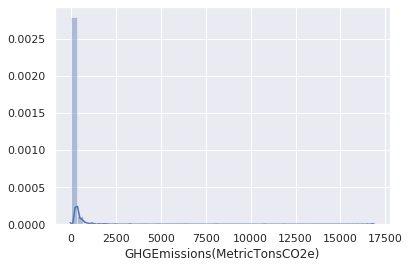

In [34]:
sns.distplot(data[targetEMI])

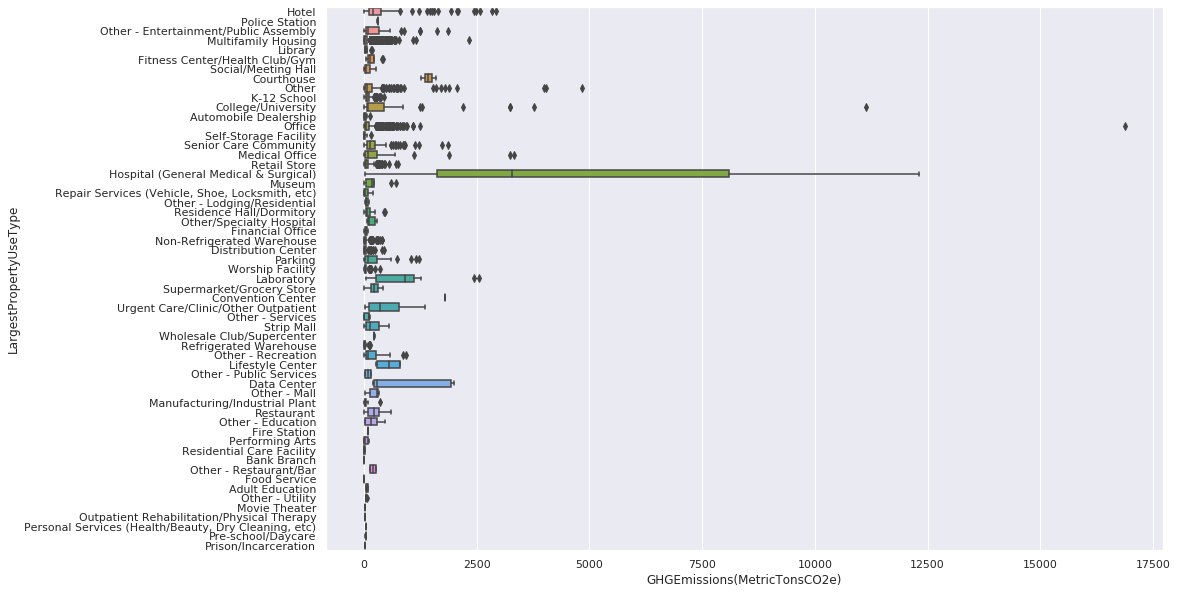

In [35]:

plotData = data

ydata = "LargestPropertyUseType"
xdata = targetEMI

f, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(y=ydata, x=xdata, data=plotData)
plt.show()

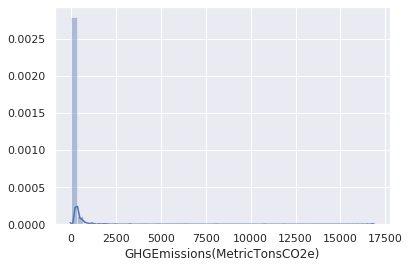

In [36]:
sns.distplot(data[targetEMI])

In [37]:
data["logEMI"] = np.log(data[targetEMI])


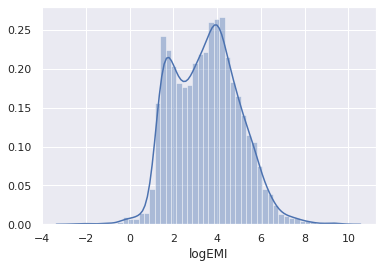

In [38]:
sns.distplot(data["logEMI"])

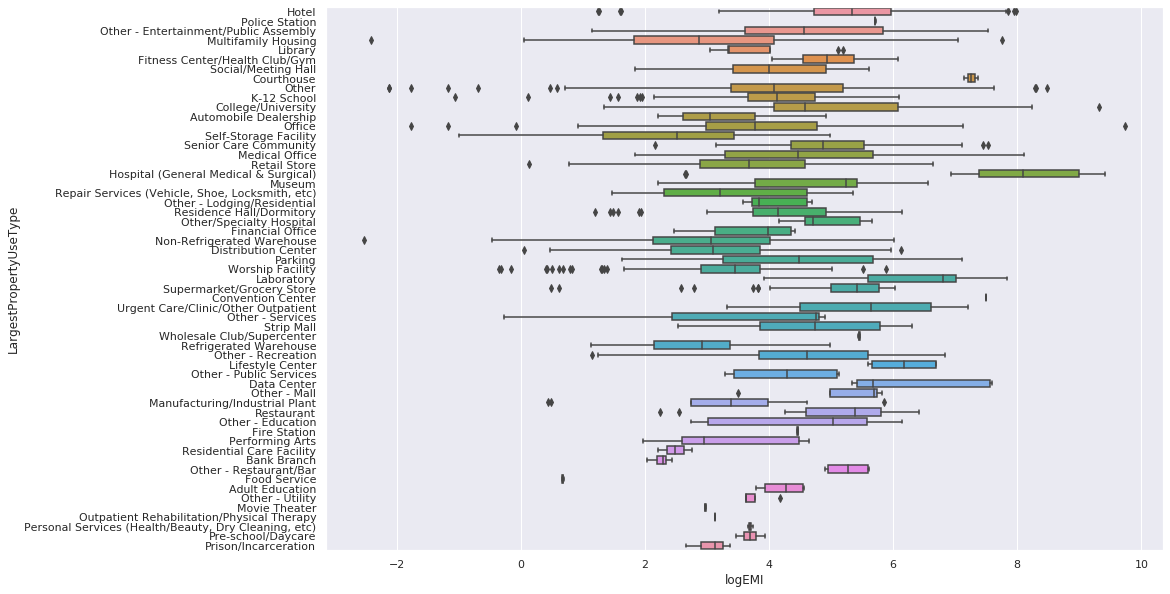

In [39]:
plotData = data

ydata = "LargestPropertyUseType"
xdata = "logEMI"

f, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(y=ydata, x=xdata, data=plotData)
plt.show()

In [40]:
targetEMI = "logEMI"

### CONSOMATION

In [41]:
data.shape

(6541, 16)

In [42]:
idxNega = []
for index, row in data.iterrows() : 
    if row[targetCONSO] <= 0 : idxNega.append(index)
idxNega
data = data.drop(idxNega)

In [43]:
data = data.dropna(subset=[targetCONSO])

data.shape

(6525, 16)

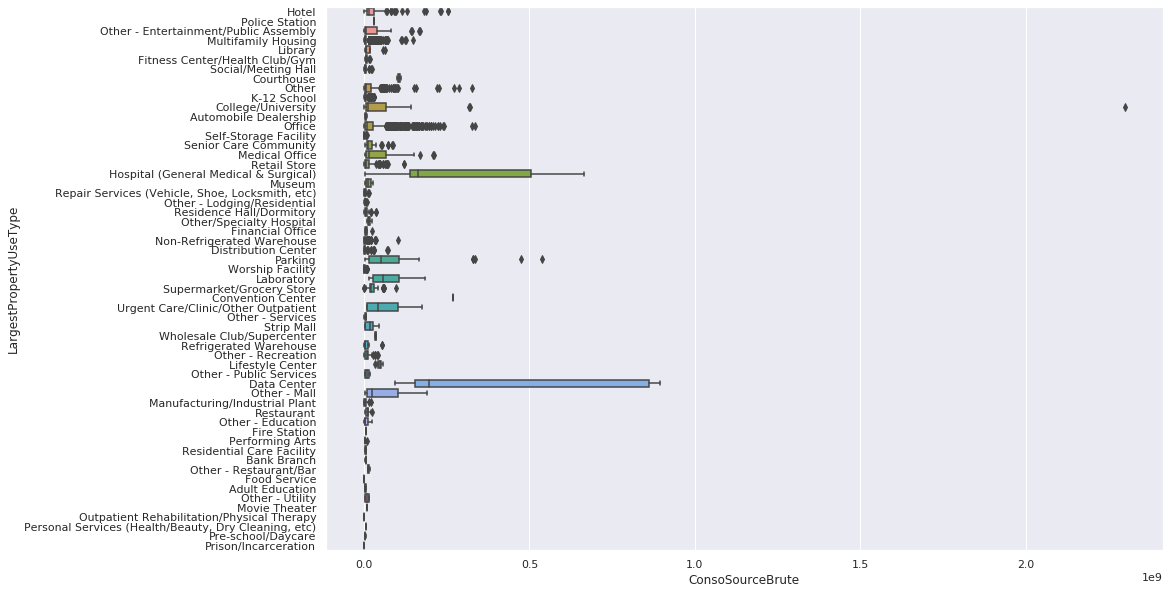

In [44]:
plotData = data

ydata = "LargestPropertyUseType"
xdata = targetCONSO

f, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.boxplot(y=ydata, x=xdata, data=plotData)
plt.show()

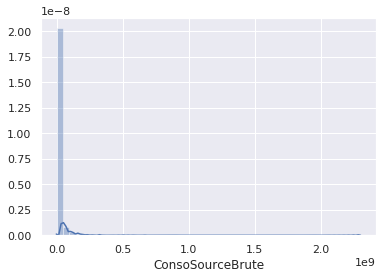

In [45]:
sns.distplot(data[targetCONSO])

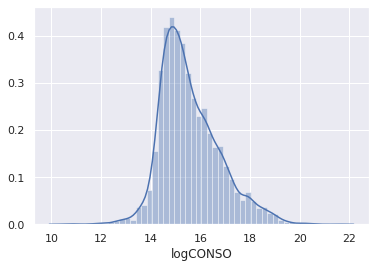

In [46]:
data["logCONSO"] = np.log(data[targetCONSO])
sns.distplot(data["logCONSO"])

In [47]:
targetCONSO = "logCONSO"

### NumberofFloors

In [48]:

import math

idxNaN = []
for index, row in data.iterrows() :
    if math.isnan(row["NumberofFloors"]): 
        print(row["NumberofFloors"], index)
        idxNaN.append(index)
maxNaNEMI = data.loc[idxNaN, targetEMI].max()
maxNaNCONSO = data.loc[idxNaN, targetCONSO].max()
maxNaNCONSO

nan ('2015', 2015)
nan ('2015', 3171)
nan ('2015', 3172)
nan ('2015', 3173)
nan ('2015', 3193)
nan ('2015', 3209)
nan ('2015', 3311)
nan ('2015', 3313)


17.765999576446596

Text(6.7076688572432905, 0.0025, 'maxNaN EMI ')

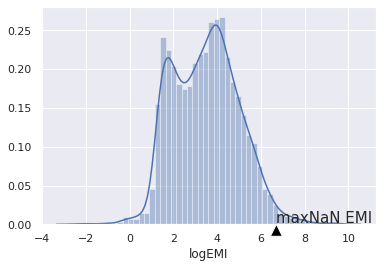

In [49]:
sns.distplot(data[targetEMI])
plt.annotate('maxNaN EMI ', xy=(maxNaNEMI,0.000), xytext=(maxNaNEMI,0.0025), fontsize=15,
arrowprops={'facecolor':'black'} )

Text(17.765999576446596, 1e-08, 'maxNaN EMI ')

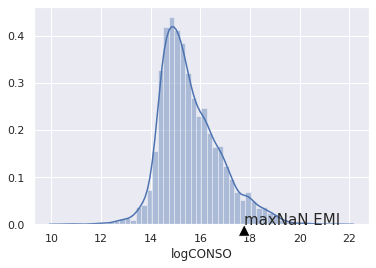

In [50]:
sns.distplot(data[targetCONSO])
plt.annotate('maxNaN EMI ', xy=(maxNaNCONSO,0.000), xytext=(maxNaNCONSO,0.00000001), fontsize=15,
arrowprops={'facecolor':'black'} )

In [51]:
data = data.drop(idxNaN)

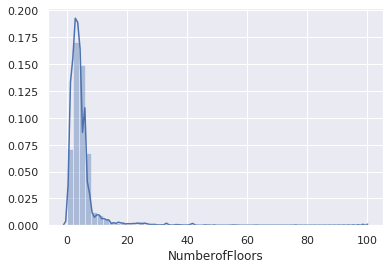

In [52]:
sns.distplot(data["NumberofFloors"])
# plt.annotate('maxNaN EMI ', xy=(maxNaNCONSO,0.000), xytext=(maxNaNCONSO,0.00000001), fontsize=15,
# arrowprops={'facecolor':'black'} )

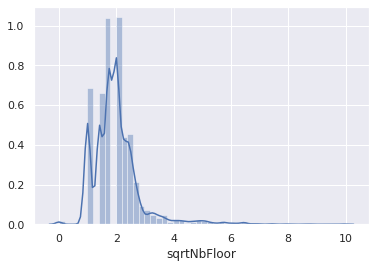

In [53]:
data["sqrtNbFloor"] = np.sqrt(data["NumberofFloors"])
sns.distplot(data["sqrtNbFloor"])

### NumberofBuildings

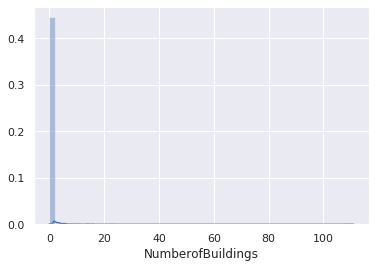

In [54]:
sns.distplot(data["NumberofBuildings"])

In [55]:
idxZero = []
for index, row in data.iterrows() :
    if row["NumberofBuildings"] == 0 : 
#         print(row["NumberofBuildings"], index)
        print(index, row["LargestPropertyUseType"],"/" ,  row["SecondLargestPropertyUseType"],"/" , row["ThirdLargestPropertyUseType"],"/" ,  row["BuildingType"] )
        idxZero.append(index)

('2016', 63) Medical Office / nan / nan / NonResidential
('2016', 76) Office / Data Center / Distribution Center / NonResidential
('2016', 160) Non-Refrigerated Warehouse / nan / nan / NonResidential
('2016', 201) Office / nan / nan / NonResidential
('2016', 241) Office / nan / nan / NonResidential
('2016', 264) Non-Refrigerated Warehouse / Office / Distribution Center / NonResidential
('2016', 278) Office / Other / Retail Store / NonResidential
('2016', 280) Hotel / nan / nan / NonResidential
('2016', 291) Parking / Movie Theater / Other - Restaurant/Bar / NonResidential
('2016', 358) Other - Services / Office / nan / Nonresidential COS
('2016', 365) Wholesale Club/Supercenter / nan / nan / NonResidential
('2016', 417) Strip Mall / nan / nan / NonResidential
('2016', 429) Parking / Laboratory / Office / NonResidential
('2016', 433) Other / nan / nan / NonResidential
('2016', 477) Office / Retail Store / Non-Refrigerated Warehouse / NonResidential
('2016', 481) Office / nan / nan / Non

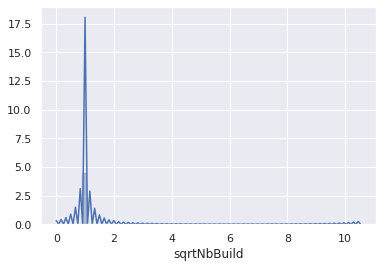

In [56]:
data["sqrtNbBuild"] = np.sqrt(data["NumberofBuildings"])
sns.distplot(data["sqrtNbBuild"])

### YearBuilt

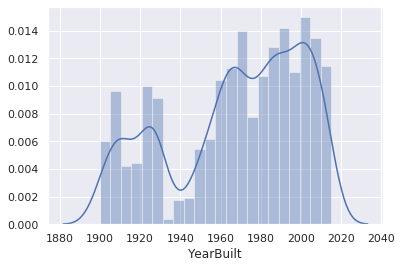

In [57]:
sns.distplot(data["YearBuilt"])

### GFA

In [58]:
colGFA = [
    'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)']

In [59]:
data.shape

(6517, 19)

In [60]:
idxNega = []
for index, row in data.iterrows() : 
    if row["PropertyGFAParking"] < 0 : idxNega.append(index)
    if row['PropertyGFABuilding(s)'] < 0 : idxNega.append(index)
    if row['PropertyGFATotal'] < 0 : idxNega.append(index)
idxNega
data.loc[idxNega]
# data = data.drop(idxNega)

OSEBuildingID          BuildingType  CouncilDistrictCode  \
2015 2428          25530  Multifamily MR (5-9)                    2   
     3136          29551        NonResidential                    2   
     3139          29788        NonResidential                    7   
     3322          50002        NonResidential                    4   

           YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2015 2428       1964                1.0             5.0             20967   
     3136       2000                1.0            11.0             68452   
     3139       1982                1.0             5.0             54015   
     3322       2014                1.0             3.0             33648   

           PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
2015 2428                  -3                   20970    Multifamily Housing   
     3136                  -2                   68454                 Office   
     3139               97325                  -43310                 Office   
     3322               84198                  -50550                Parking   

          SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
2015 2428                          NaN                         NaN   
     3136                  Bank Branch                         NaN   
     3139                          NaN                         NaN   
     3322        Automobile Dealership                         NaN   

           ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  ConsoSourceBrute  \
2015 2428             81.0                          3.76         1694133.6   
     3136             81.0                         25.59        11527316.8   
     3139             65.0                         24.09        10851613.5   
     3322              NaN                          9.69         3765211.2   

             logEMI   logCONSO  sqrtNbFloor  sqrtNbBuild  
2015 2428  1.324419  14.342682     2.236068          1.0  
     3136  3.242202  16.260230     3.316625          1.0  
     3139  3.181797  16.199824     2.236068          1.0  
     3322  2.271094  15.141315     1.732051          1.0

In [61]:
data.loc[idxNega, 'PropertyGFABuilding(s)'] = np.abs(data.loc[idxNega, 'PropertyGFABuilding(s)'] )

In [62]:
idxNega = []
for index, row in data.iterrows() : 
    if row["PropertyGFAParking"] < 0 : idxNega.append(index)
idxNega
data.loc[idxNega]
# data = data.drop(idxNega)

OSEBuildingID          BuildingType  CouncilDistrictCode  \
2015 2428          25530  Multifamily MR (5-9)                    2   
     3136          29551        NonResidential                    2   

           YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2015 2428       1964                1.0             5.0             20967   
     3136       2000                1.0            11.0             68452   

           PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
2015 2428                  -3                   20970    Multifamily Housing   
     3136                  -2                   68454                 Office   

          SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
2015 2428                          NaN                         NaN   
     3136                  Bank Branch                         NaN   

           ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  ConsoSourceBrute  \
2015 2428             81.0                          3.76         1694133.6   
     3136             81.0                         25.59        11527316.8   

             logEMI   logCONSO  sqrtNbFloor  sqrtNbBuild  
2015 2428  1.324419  14.342682     2.236068          1.0  
     3136  3.242202  16.260230     3.316625          1.0

In [63]:
data = data.drop(columns=["PropertyGFATotal"])

In [64]:
data.loc[:, "PropertyGFAParking"] = data.loc[:, "PropertyGFAParking"].replace(0, 1)

In [65]:
data["logGFAPark"] = np.log(data["PropertyGFAParking"])
plotData = data["logGFAPark"]
plotData = plotData.replace(0, np.nan)
plotData = plotData.dropna()


/home/ious/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


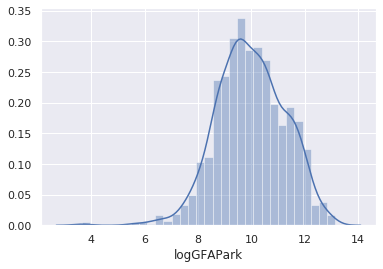

In [66]:
sns.distplot(plotData)

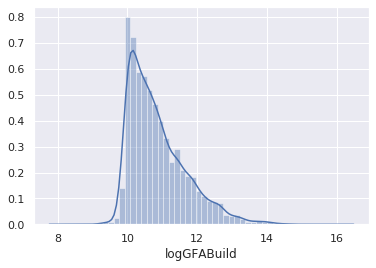

In [67]:

data["logGFABuild"] = np.log(data["PropertyGFABuilding(s)"])
sns.distplot(data["logGFABuild"])

In [68]:
data

OSEBuildingID        BuildingType  CouncilDistrictCode  YearBuilt  \
2015 0                 1      NonResidential                    7       1927   
     1                 2      NonResidential                    7       1996   
     2                 3      NonResidential                    7       1969   
     3                 5      NonResidential                    7       1926   
     4                 8      NonResidential                    7       1980   
...                  ...                 ...                  ...        ...   
2016 3371          50222  Nonresidential COS                    2       1990   
     3372          50223  Nonresidential COS                    2       2004   
     3373          50224  Nonresidential COS                    7       1974   
     3374          50225  Nonresidential COS                    1       1989   
     3375          50226  Nonresidential COS                    2       1938   

           NumberofBuildings  NumberofFloors  PropertyGFAParking  \
2015 0                   1.0            12.0                   1   
     1                   1.0            11.0               15064   
     2                   1.0            41.0                   1   
     3                   1.0            10.0                   1   
     4                   1.0            18.0               12460   
...                      ...             ...                 ...   
2016 3371                1.0             1.0                   1   
     3372                1.0             1.0                   1   
     3373                1.0             1.0                   1   
     3374                1.0             1.0                   1   
     3375                1.0             1.0                   1   

           PropertyGFABuilding(s) LargestPropertyUseType  \
2015 0                      88434                  Hotel   
     1                      88502                  Hotel   
     2                     961990                  Hotel   
     3                      61320                  Hotel   
     4                     107430                  Hotel   
...                           ...                    ...   
2016 3371                   12294                 Office   
     3372                   16000     Other - Recreation   
     3373                   13157     Other - Recreation   
     3374                   14101     Other - Recreation   
     3375                   18258     Other - Recreation   

             SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
2015 0                                NaN                         NaN   
     1                            Parking                  Restaurant   
     2                            Parking               Swimming Pool   
     3                                NaN                         NaN   
     4                            Parking               Swimming Pool   
...                                   ...                         ...   
2016 3371                             NaN                         NaN   
     3372                             NaN                         NaN   
     3373  Fitness Center/Health Club/Gym               Swimming Pool   
     3374  Fitness Center/Health Club/Gym          Pre-school/Daycare   
     3375  Fitness Center/Health Club/Gym          Pre-school/Daycare   

           ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  ConsoSourceBrute  \
2015 0                65.0                        249.43      1.534330e+07   
     1                51.0                        263.51      1.981218e+07   
     2                18.0                       2061.48      2.334750e+08   
     3                 1.0                       1936.34      3.901792e+07   
     4                67.0                        507.70      2.743083e+07   
...                    ...                           ...               ...   
2016 3371             46.0                         20.94      1.987940e+06   
     3372  

In [69]:
colQuantiTransf = [
    "logEMI","logCONSO","logGFAPark","logGFABuild",'CouncilDistrictCode',
 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'ENERGYSTARScore']

In [70]:
colQuantiTransf

['logEMI',
 'logCONSO',
 'logGFAPark',
 'logGFABuild',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'ENERGYSTARScore']

### tableau de correlation de pearson

In [71]:
dataCorrelation = data.loc[:, colQuantiTransf].dropna()
dataCorrelation

logEMI   logCONSO  logGFAPark  logGFABuild  CouncilDistrictCode  \
2015 0     5.519178  16.546189    0.000000    11.390012                    7   
     1     5.574091  16.801807    9.620063    11.390780                    7   
     2     7.631179  19.268585    0.000000    13.776759                    7   
     3     7.568555  17.479531    0.000000    11.023861                    7   
     4     6.229891  17.127178    9.430279    11.584595                    7   
...             ...        ...         ...          ...                  ...   
2016 3357  4.573680  16.093965   10.982203    11.913834                    1   
     3358  2.938103  14.580095    7.855545     9.779397                    3   
     3366  1.252763  14.271571    0.000000     9.522300                    7   
     3369  2.052841  13.802437    0.000000     9.641993                    2   
     3371  3.041661  14.502609    0.000000     9.416867                    2   

           YearBuilt  NumberofBuildings  NumberofFloors  ENERGYSTARScore  
2015 0          1927                1.0            12.0             65.0  
     1          1996                1.0            11.0             51.0  
     2          1969                1.0            41.0             18.0  
     3          1926                1.0            10.0              1.0  
     4          1980                1.0            18.0             67.0  
...              ...                ...             ...              ...  
2016 3357       2015                1.0             7.0            100.0  
     3358       2014                1.0             4.0             99.0  
     3366       1952                1.0             1.0             75.0  
     3369       1960                1.0             1.0             93.0  
     3371       1990                1.0             1.0             46.0  

[4965 rows x 9 columns]

In [72]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
scaler = StandardScaler()




scaler.fit(dataCorrelation)

dataCorrelationStd=scaler.transform(dataCorrelation)



dataCorrelationStd
n=9
s = (n, n)
tabCorrelation = np.zeros(s)

for i in range(0, n):
    for j in range(0, n):
        tabCorrelation[i, j] = '{:03.2f}'.format(stats.pearsonr(
            dataCorrelationStd[:, i], dataCorrelationStd[:, j])[0])


tabCorrelation = pd.DataFrame(tabCorrelation,
                   columns=colQuantiTransf,\
                             index=colQuantiTransf)

tabCorrelation

,logEMI,logCONSO,logGFAPark,logGFABuild,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore
logEMI,1.00,0.74,0.18,0.66,0.15,0.00,0.06,0.34,-0.18
logCONSO,0.74,1.00,0.40,0.84,0.21,0.27,0.07,0.49,-0.21
logGFAPark,0.18,0.40,1.00,0.25,0.17,0.27,-0.01,0.26,0.04
logGFABuild,0.66,0.84,0.25,1.00,0.17,0.26,0.08,0.54,0.06
CouncilDistrictCode,0.15,0.21,0.17,0.17,1.00,-0.00,-0.01,0.25,0.07
YearBuilt,0.00,0.27,0.27,0.26,-0.00,1.00,0.02,0.14,0.02
NumberofBuildings,0.06,0.07,-0.01,0.08,-0.01,0.02,1.00,-0.01,-0.00
NumberofFloors,0.34,0.49,0.26,0.54,0.25,0.14,-0.01,1.00,0.02
ENERGYSTARScore,-0.18,-0.21,0.04,0.06,0.07,0.02,-0.00,0.02,1.00


## traitement variables quali

In [73]:
colQuali

['BuildingType',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']

### PropertyUseType

In [74]:
data.loc[:, ['LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType']]

LargestPropertyUseType    SecondLargestPropertyUseType  \
2015 0                     Hotel                             NaN   
     1                     Hotel                         Parking   
     2                     Hotel                         Parking   
     3                     Hotel                             NaN   
     4                     Hotel                         Parking   
...                          ...                             ...   
2016 3371                 Office                             NaN   
     3372     Other - Recreation                             NaN   
     3373     Other - Recreation  Fitness Center/Health Club/Gym   
     3374     Other - Recreation  Fitness Center/Health Club/Gym   
     3375     Other - Recreation  Fitness Center/Health Club/Gym   

          ThirdLargestPropertyUseType  
2015 0                            NaN  
     1                     Restaurant  
     2                  Swimming Pool  
     3                            NaN  
     4                  Swimming Pool  
...                               ...  
2016 3371                         NaN  
     3372                         NaN  
     3373               Swimming Pool  
     3374          Pre-school/Daycare  
     3375          Pre-school/Daycare  

[6517 rows x 3 columns]

In [75]:
listLargest = data.loc[:, 'LargestPropertyUseType'].unique()

In [76]:
listSecond = data.loc[:, 'SecondLargestPropertyUseType'].unique()

In [77]:
listThird = data.loc[:, 'ThirdLargestPropertyUseType'].unique()

In [78]:
for type in listThird : 
    if not type in listLargest : print(type)

nan
Swimming Pool
Convenience Store without Gas Station
Fast Food Restaurant
Bar/Nightclub
Food Sales
Enclosed Mall
Other - Technology/Science
Vocational School


In [79]:
for type in listSecond : 
    if not type in listLargest : print(type)

nan
Vocational School
Swimming Pool
Convenience Store without Gas Station
Bar/Nightclub
Food Sales
Enclosed Mall


In [80]:
data.LargestPropertyUseType.values

array(['Hotel', 'Hotel', 'Hotel', ..., 'Other - Recreation',
       'Other - Recreation', 'Other - Recreation'], dtype=object)

In [81]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

# print(data.LargestPropertyUseType.unique())

ohe = ohc.fit_transform(data.LargestPropertyUseType.values.reshape(-1,1)).toarray()
dfOnHotLargest = pd.DataFrame(ohe, columns = ["UType_" + str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )        ], index = data.index)

dfOnHotLargest = dfOnHotLargest.replace(1, 3)
dfOnHotLargest = dfOnHotLargest.replace(0, np.nan)


In [82]:
data.SecondLargestPropertyUseType.values

array([nan, 'Parking', 'Parking', ..., 'Fitness Center/Health Club/Gym',
       'Fitness Center/Health Club/Gym', 'Fitness Center/Health Club/Gym'],
      dtype=object)

In [83]:
ohc = OneHotEncoder()

dataSecond = data.dropna(subset=['SecondLargestPropertyUseType'])

# print(data.LargestPropertyUseType.unique())

ohe = ohc.fit_transform(dataSecond.SecondLargestPropertyUseType.values.reshape(-1,1)).toarray()
dfOnHotSecondLargest = pd.DataFrame(ohe, columns = ["UType_" + str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )        ], index = dataSecond.index)


dfOnHotSecondLargest = dfOnHotSecondLargest.replace(1, 2)
dfOnHotSecondLargest = dfOnHotSecondLargest.replace(0, np.nan)


In [84]:
ohc = OneHotEncoder()

dataThird = data.dropna(subset=['ThirdLargestPropertyUseType'])

# print(data.LargestPropertyUseType.unique())

ohe = ohc.fit_transform(dataThird.ThirdLargestPropertyUseType.values.reshape(-1,1)).toarray()
dfOnHotThirdLargest = pd.DataFrame(ohe, columns = ["UType_" + str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )        ], index = dataThird.index)



dfOnHotThirdLargest = dfOnHotThirdLargest.replace(1, 1)
dfOnHotThirdLargest = dfOnHotThirdLargest.replace(0, np.nan)

In [85]:
data

OSEBuildingID        BuildingType  CouncilDistrictCode  YearBuilt  \
2015 0                 1      NonResidential                    7       1927   
     1                 2      NonResidential                    7       1996   
     2                 3      NonResidential                    7       1969   
     3                 5      NonResidential                    7       1926   
     4                 8      NonResidential                    7       1980   
...                  ...                 ...                  ...        ...   
2016 3371          50222  Nonresidential COS                    2       1990   
     3372          50223  Nonresidential COS                    2       2004   
     3373          50224  Nonresidential COS                    7       1974   
     3374          50225  Nonresidential COS                    1       1989   
     3375          50226  Nonresidential COS                    2       1938   

           NumberofBuildings  NumberofFloors  PropertyGFAParking  \
2015 0                   1.0            12.0                   1   
     1                   1.0            11.0               15064   
     2                   1.0            41.0                   1   
     3                   1.0            10.0                   1   
     4                   1.0            18.0               12460   
...                      ...             ...                 ...   
2016 3371                1.0             1.0                   1   
     3372                1.0             1.0                   1   
     3373                1.0             1.0                   1   
     3374                1.0             1.0                   1   
     3375                1.0             1.0                   1   

           PropertyGFABuilding(s) LargestPropertyUseType  \
2015 0                      88434                  Hotel   
     1                      88502                  Hotel   
     2                     961990                  Hotel   
     3                      61320                  Hotel   
     4                     107430                  Hotel   
...                           ...                    ...   
2016 3371                   12294                 Office   
     3372                   16000     Other - Recreation   
     3373                   13157     Other - Recreation   
     3374                   14101     Other - Recreation   
     3375                   18258     Other - Recreation   

             SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
2015 0                                NaN                         NaN   
     1                            Parking                  Restaurant   
     2                            Parking               Swimming Pool   
     3                                NaN                         NaN   
     4                            Parking               Swimming Pool   
...                                   ...                         ...   
2016 3371                             NaN                         NaN   
     3372                             NaN                         NaN   
     3373  Fitness Center/Health Club/Gym               Swimming Pool   
     3374  Fitness Center/Health Club/Gym          Pre-school/Daycare   
     3375  Fitness Center/Health Club/Gym          Pre-school/Daycare   

           ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  ConsoSourceBrute  \
2015 0                65.0                        249.43      1.534330e+07   
     1                51.0                        263.51      1.981218e+07   
     2                18.0                       2061.48      2.334750e+08   
     3                 1.0                       1936.34      3.901792e+07   
     4                67.0                        507.70      2.743083e+07   
...                    ...                           ...               ...   
2016 3371             46.0                         20.94      1.987940e+06   
     3372  

In [86]:
 result = dfOnHotLargest.combine_first(dfOnHotSecondLargest)

In [87]:
result = result.combine_first(dfOnHotThirdLargest)

In [88]:
result.columns.shape

(65,)

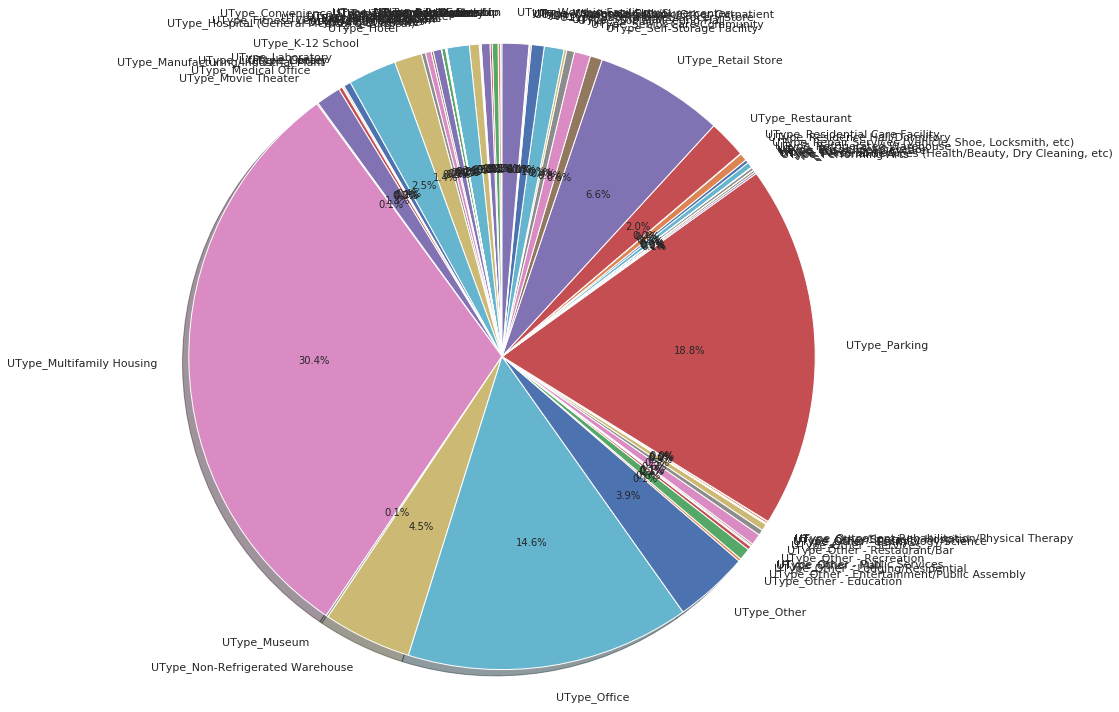

In [89]:

# Pie chart
labels = result.columns.to_list()
sizes = result.count().to_list()
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  


fig1, ax1 = plt.subplots(1, 1, figsize=(15, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [90]:
dropCat = [cat for cat in result.columns if result.count().loc[cat] / result.count().max() <= 0.046]


result = result.drop(columns=dropCat)

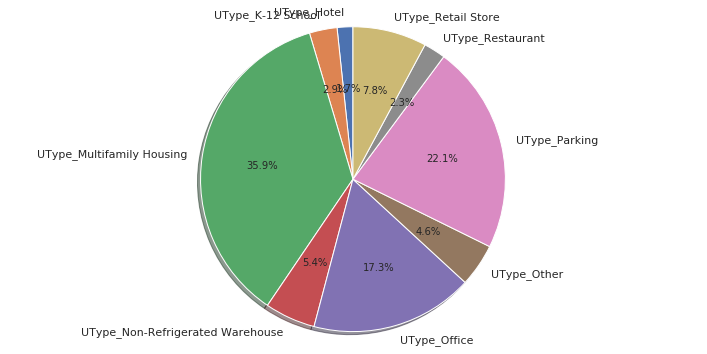

In [91]:

# Pie chart
labels = result.columns.to_list()
sizes = result.count().to_list()
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  


fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [92]:
result = result.replace(np.nan, 0)

In [109]:
result.head()

UType_Hotel  UType_K-12 School  UType_Multifamily Housing  \
2015 0          3.0                0.0                        0.0   
     1          3.0                0.0                        0.0   
     2          3.0                0.0                        0.0   
     3          3.0                0.0                        0.0   
     4          3.0                0.0                        0.0   

        UType_Non-Refrigerated Warehouse  UType_Office  UType_Other  \
2015 0                               0.0           0.0          0.0   
     1                               0.0           0.0          0.0   
     2                               0.0           0.0          0.0   
     3                               0.0           0.0          0.0   
     4                               0.0           0.0          0.0   

        UType_Parking  UType_Restaurant  UType_Retail Store  
2015 0            0.0               0.0                 0.0  
     1            2.0               1.0                 0.0  
     2            2.0               0.0                 0.0  
     3            0.0               0.0                 0.0  
     4            2.0               0.0                 0.0

In [107]:
print(result.head().to_latex())

\begin{tabular}{llrrrrrrrrr}
\toprule
     &   &  UType\_Hotel &  UType\_K-12 School &  UType\_Multifamily Housing &  UType\_Non-Refrigerated Warehouse &  UType\_Office &  UType\_Other &  UType\_Parking &  UType\_Restaurant &  UType\_Retail Store \\
\midrule
2015 & 0 &          3.0 &                0.0 &                        0.0 &                               0.0 &           0.0 &          0.0 &            0.0 &               0.0 &                 0.0 \\
     & 1 &          3.0 &                0.0 &                        0.0 &                               0.0 &           0.0 &          0.0 &            2.0 &               1.0 &                 0.0 \\
     & 2 &          3.0 &                0.0 &                        0.0 &                               0.0 &           0.0 &          0.0 &            2.0 &               0.0 &                 0.0 \\
     & 3 &          3.0 &                0.0 &                        0.0 &                               0.0 &           0.0 &     

In [93]:
data = pd.concat([data, result], axis=1)
data

OSEBuildingID        BuildingType  CouncilDistrictCode  YearBuilt  \
2015 0                 1      NonResidential                    7       1927   
     1                 2      NonResidential                    7       1996   
     2                 3      NonResidential                    7       1969   
     3                 5      NonResidential                    7       1926   
     4                 8      NonResidential                    7       1980   
...                  ...                 ...                  ...        ...   
2016 3371          50222  Nonresidential COS                    2       1990   
     3372          50223  Nonresidential COS                    2       2004   
     3373          50224  Nonresidential COS                    7       1974   
     3374          50225  Nonresidential COS                    1       1989   
     3375          50226  Nonresidential COS                    2       1938   

           NumberofBuildings  NumberofFloors  PropertyGFAParking  \
2015 0                   1.0            12.0                   1   
     1                   1.0            11.0               15064   
     2                   1.0            41.0                   1   
     3                   1.0            10.0                   1   
     4                   1.0            18.0               12460   
...                      ...             ...                 ...   
2016 3371                1.0             1.0                   1   
     3372                1.0             1.0                   1   
     3373                1.0             1.0                   1   
     3374                1.0             1.0                   1   
     3375                1.0             1.0                   1   

           PropertyGFABuilding(s) LargestPropertyUseType  \
2015 0                      88434                  Hotel   
     1                      88502                  Hotel   
     2                     961990                  Hotel   
     3                      61320                  Hotel   
     4                     107430                  Hotel   
...                           ...                    ...   
2016 3371                   12294                 Office   
     3372                   16000     Other - Recreation   
     3373                   13157     Other - Recreation   
     3374                   14101     Other - Recreation   
     3375                   18258     Other - Recreation   

             SecondLargestPropertyUseType  ... logGFABuild  UType_Hotel  \
2015 0                                NaN  ...   11.390012          3.0   
     1                            Parking  ...   11.390780          3.0   
     2                            Parking  ...   13.776759          3.0   
     3                                NaN  ...   11.023861          3.0   
     4                            Parking  ...   11.584595          3.0   
...                                   ...  ...         ...          ...   
2016 3371                             NaN  ...    9.416867          0.0   
     3372                             NaN  ...    9.680344          0.0   
     3373  Fitness Center/Health Club/Gym  ...    9.484709          0.0   
     3374  Fitness Center/Health Club/Gym  ...    9.554001          0.0   
     3375  Fitness Center/Health Club/Gym  ...    9.812359          0.0   

           UType_K-12 School  UType_Multifamily Housing  \
2015 0                   0.0                        0.0   
     1                   0.0                        0.0   
     2                   0.0                        0.0   
     3                   0.0                        0.0   
     4                   0.0                        0.0   
...                      ...                        ...   
2016 3371                0.0                        0.0   
     3372                0.0                        0.0   
     3373                0.0                        0.0   
     3374            

In [94]:
data = data.drop(columns=["LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"])

In [95]:
data

OSEBuildingID        BuildingType  CouncilDistrictCode  YearBuilt  \
2015 0                 1      NonResidential                    7       1927   
     1                 2      NonResidential                    7       1996   
     2                 3      NonResidential                    7       1969   
     3                 5      NonResidential                    7       1926   
     4                 8      NonResidential                    7       1980   
...                  ...                 ...                  ...        ...   
2016 3371          50222  Nonresidential COS                    2       1990   
     3372          50223  Nonresidential COS                    2       2004   
     3373          50224  Nonresidential COS                    7       1974   
     3374          50225  Nonresidential COS                    1       1989   
     3375          50226  Nonresidential COS                    2       1938   

           NumberofBuildings  NumberofFloors  PropertyGFAParking  \
2015 0                   1.0            12.0                   1   
     1                   1.0            11.0               15064   
     2                   1.0            41.0                   1   
     3                   1.0            10.0                   1   
     4                   1.0            18.0               12460   
...                      ...             ...                 ...   
2016 3371                1.0             1.0                   1   
     3372                1.0             1.0                   1   
     3373                1.0             1.0                   1   
     3374                1.0             1.0                   1   
     3375                1.0             1.0                   1   

           PropertyGFABuilding(s)  ENERGYSTARScore  \
2015 0                      88434             65.0   
     1                      88502             51.0   
     2                     961990             18.0   
     3                      61320              1.0   
     4                     107430             67.0   
...                           ...              ...   
2016 3371                   12294             46.0   
     3372                   16000              NaN   
     3373                   13157              NaN   
     3374                   14101              NaN   
     3375                   18258              NaN   

           GHGEmissions(MetricTonsCO2e)  ...  logGFABuild  UType_Hotel  \
2015 0                           249.43  ...    11.390012          3.0   
     1                           263.51  ...    11.390780          3.0   
     2                          2061.48  ...    13.776759          3.0   
     3                          1936.34  ...    11.023861          3.0   
     4                           507.70  ...    11.584595          3.0   
...                                 ...  ...          ...          ...   
2016 3371                         20.94  ...     9.416867          0.0   
     3372                         32.17  ...     9.680344          0.0   
     3373                        223.54  ...     9.484709          0.0   
     3374                         22.11  ...     9.554001          0.0   
     3375                         41.27  ...     9.812359          0.0   

           UType_K-12 School  UType_Multifamily Housing  \
2015 0                   0.0                        0.0   
     1                   0.0                        0.0   
     2                   0.0                        0.0   
     3                   0.0                        0.0   
     4                   0.0                        0.0   
...                      ...                        ...   
2016 3371                0.0                        0.0   
     3372                0.0                        0.0   
     3373                0.0                        0.0   
     3374                0.0                        0.0   
     3375                0.0                  

### BuildingType

In [96]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()

# print(data.LargestPropertyUseType.unique())

ohe = ohc.fit_transform(data.BuildingType.values.reshape(-1,1)).toarray()
resultsBT = pd.DataFrame(ohe, columns = ["BType_" + str(ohc.categories_[0][i]) 
                                       for i in range(len(ohc.categories_[0]) )], index = data.index)

resultsBT = resultsBT.replace(0, np.nan)

In [97]:
resultsBT.count()

BType_Campus                    45
BType_Multifamily HR (10+)     209
BType_Multifamily LR (1-4)    1985
BType_Multifamily MR (5-9)    1113
BType_NonResidential          2841
BType_Nonresidential COS       150
BType_Nonresidential WA          1
BType_SPS-District K-12        173
dtype: int64

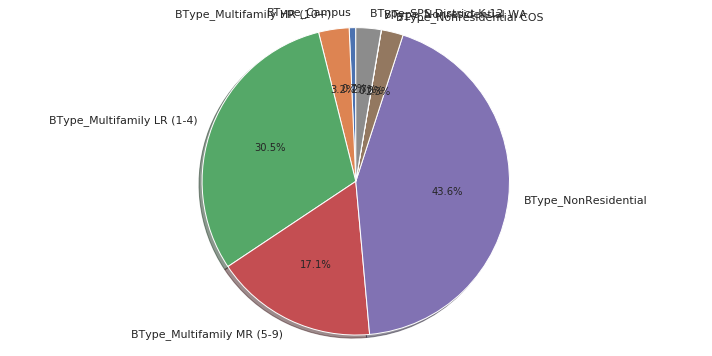

In [98]:

# Pie chart
labels = resultsBT.columns.to_list()
sizes = resultsBT.count().to_list()
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  


fig1, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [99]:
dropCat = [cat for cat in resultsBT.columns if resultsBT.count().loc[cat] / resultsBT.count().max() <= 0.05]


resultsBT = resultsBT.drop(columns=dropCat)

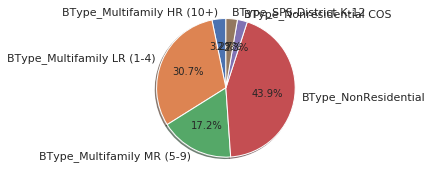

In [100]:

# Pie chart
labels = resultsBT.columns.to_list()
sizes = resultsBT.count().to_list()
# only "explode" the 2nd slice (i.e. 'Hogs')
# explode = (0, 0.1, 0, 0)  


fig1, ax1 = plt.subplots(1, 1, figsize=(5, 2.5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [101]:
resultsBT = resultsBT.replace(np.nan, 0)
data = pd.concat([data, resultsBT], axis=1)
data = data.drop(columns=["BuildingType"])
data

OSEBuildingID  CouncilDistrictCode  YearBuilt  NumberofBuildings  \
2015 0                 1                    7       1927                1.0   
     1                 2                    7       1996                1.0   
     2                 3                    7       1969                1.0   
     3                 5                    7       1926                1.0   
     4                 8                    7       1980                1.0   
...                  ...                  ...        ...                ...   
2016 3371          50222                    2       1990                1.0   
     3372          50223                    2       2004                1.0   
     3373          50224                    7       1974                1.0   
     3374          50225                    1       1989                1.0   
     3375          50226                    2       1938                1.0   

           NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
2015 0               12.0                   1                   88434   
     1               11.0               15064                   88502   
     2               41.0                   1                  961990   
     3               10.0                   1                   61320   
     4               18.0               12460                  107430   
...                   ...                 ...                     ...   
2016 3371             1.0                   1                   12294   
     3372             1.0                   1                   16000   
     3373             1.0                   1                   13157   
     3374             1.0                   1                   14101   
     3375             1.0                   1                   18258   

           ENERGYSTARScore  GHGEmissions(MetricTonsCO2e)  ConsoSourceBrute  \
2015 0                65.0                        249.43      1.534330e+07   
     1                51.0                        263.51      1.981218e+07   
     2                18.0                       2061.48      2.334750e+08   
     3                 1.0                       1936.34      3.901792e+07   
     4                67.0                        507.70      2.743083e+07   
...                    ...                           ...               ...   
2016 3371             46.0                         20.94      1.987940e+06   
     3372              NaN                         32.17      1.827200e+06   
     3373              NaN                        223.54      9.799333e+06   
     3374              NaN                         22.11      1.484835e+06   
     3375              NaN                         41.27      2.114276e+06   

           ...  UType_Other  UType_Parking  UType_Restaurant  \
2015 0     ...          0.0            0.0               0.0   
     1     ...          0.0            2.0               1.0   
     2     ...          0.0            2.0               0.0   
     3     ...          0.0            0.0               0.0   
     4     ...          0.0            2.0               0.0   
...        ...          ...            ...               ...   
2016 3371  ...          0.0            0.0               0.0   
     3372  ...          0.0            0.0               0.0   
     3373  ...          0.0            0.0               0.0   
     3374  ...          0.0            0.0               0.0   
     3375  ...          0.0            0.0               0.0   

           UType_Retail Store  BType_Multifamily HR (10+)  \
2015 0                    0.0                         0.0   
     1                    0.0                         0.0   
     2                    0.0                         0.0   
     3                    0.0                         0.0   
     4                    0.0                         0.0   
...                       ...                         ...   
2016 3371                 0.0                       

## Save dans "donneeSimple.csv"

In [102]:
data.to_csv('donneeIngFeaturing.csv', sep='\t', encoding='utf-8')
